In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from itertools import chain
from sys import platform
from copy import deepcopy as dc

vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
if platform == 'darwin' or platform =='win32':
    for number in new_array:
        new_string = 'df'+number+' = '+'pd.read_pickle("e_data/data'+number+'.pkl")'
        exec(new_string)
else:
    df_list = []
    for number in new_array:
        new_string = 'df'+number+' = '+'pd.read_csv("e_data/data'+number+'.csv")'
        exec(new_string)
        df = 'df'+number
        new_df = locals()[df]
        df_list.append(new_df)
    for df in df_list:
        for i in range(len(df['spectrum'])):
            df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])

#Functions for later

def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

def flatten(some_list):
    flat_list = []
    for element in some_list:
        if type(element) is list:
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

band_channels = list(chain(range(29,35),range(46,60),range(78,96),range(102,106)))

window = list(range(56,83))

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

def single_fit(spectrum):
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectrum[band_channels],p0=[.15,-12])
    final_spectrum = spectrum-powerlaw(vims_wave,*my_fit)
    return final_spectrum

def shift_ret(spectrum):
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    return my_fit[1]

In [13]:
spec_list = []
for number in new_array:
    my_string = 'spec'+number+' = df'+number+"['spectrum']"
    exec(my_string)
    spec = 'spec'+number
    spec_list.append(locals()[spec])

time_list_i = []
for number in new_array:
    my_string = 'ettime'+number+' = df'+number+"['ettime']"
    exec(my_string)
    time = 'ettime'+number
    time_list_i.append(locals()[time])

time_list_f = []
for df in time_list_i:
    for time in df:
        time_list_f.append(time)

total_spectrum = []
for spec in spec_list:
    for spectrum in spec:
        total_spectrum.append(spectrum)

print(np.shape(total_spectrum))

(12655, 256)


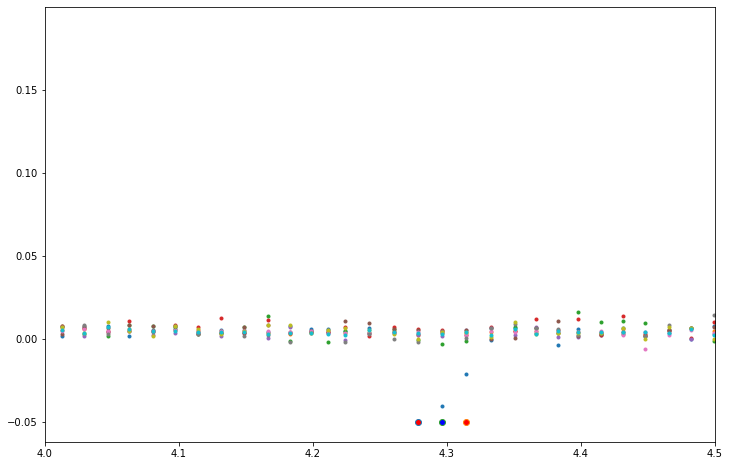

In [14]:
%matplotlib inline
plt.figure(facecolor='white',figsize=(12,8))
for spectrum in total_spectrum[2141:2151]:
    plt.plot(vims_wave,spectrum,'.')
plt.xlim(4,4.5)
plt.plot(vims_wave[205],-0.05,marker='o',markerfacecolor='red') # Lucas' guess
plt.plot(vims_wave[207],-.05,marker='o',markerfacecolor='red')
plt.plot(vims_wave[206],-.05,marker='o',markerfacecolor='blue')
plt.show()

In [15]:
total_spectrum = np.asarray(total_spectrum)

In [18]:
median = np.median(total_spectrum[2141:2151,206:208])
vals   = total_spectrum[2141:2151,206:208]
std    = np.std(total_spectrum[2141:2151,206:208])
ind    = np.where(np.abs(vals)>1000*std)
vals[ind] = median
total_spectrum2 = dc(total_spectrum)
total_spectrum2[2141:2151,206:208] = vals

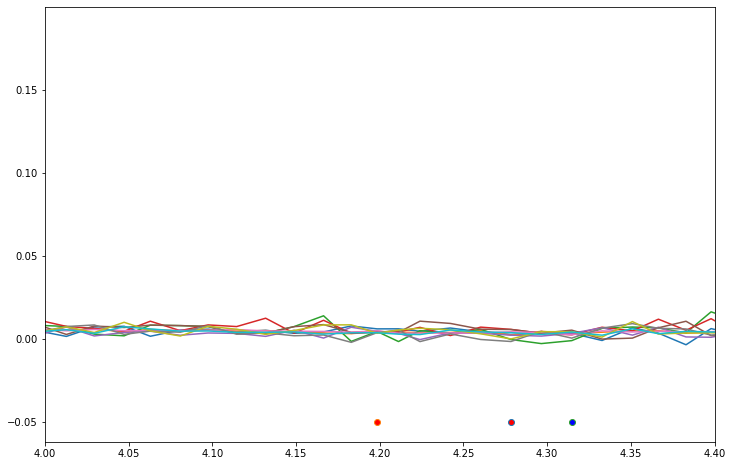

In [19]:
%matplotlib inline
plt.figure(facecolor='white',figsize=(12,8))
for spectrum in total_spectrum2[2141:2151]:
    plt.plot(vims_wave,spectrum)
plt.xlim([4,4.4])
plt.plot(vims_wave[205],-0.05,marker='o',markerfacecolor='red') # Lucas' guess
plt.plot(vims_wave[200],-.05,marker='o',markerfacecolor='red')
plt.plot(vims_wave[207],-.05,marker='o',markerfacecolor='blue')
plt.show()